# 신경망 생성
- `torch.nn` 패키지 사용

- `nn.Module`을 상속받고, 해당 모듈은 계층과 `output`을 반환하는 `forward`메소드를 포함

- 파이토치에서 신경망 생성을 위한 기본 틀

      1. class Net(nn.Module):

           def __init__(self):
               super(Net, self).__init__()

      2. class MyModel(nn.Module):

            def __init__(self):
                super(MyModel, self).__init__()

- `conv2d` 레이어를 쌓을 때, 필터의 갯수를 계산하고 `in_channels`에 넣어줘야함

        

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [24]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x       
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
            
        return num_features

net = Net()
print(net)
               

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [25]:
# 선형회귀 모델 생성

import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

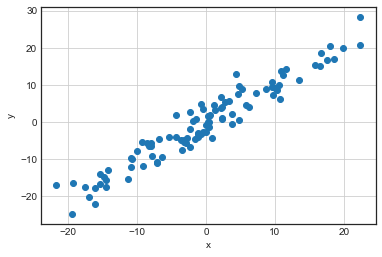

In [26]:
X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

In [27]:
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [28]:
torch.manual_seed(111)

model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [29]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


In [30]:
w, b = model.parameters()
def get_params():
    return w[0][0].item(), b[0].item()

def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 +b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X,y)

In [31]:
# 손실 함수와 옵티마이저
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [32]:
epochs = 100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    loss.backward()
    
    optimizer.step()
    
    if epoch % 10 ==0:
        print('Epoch : {:3d}\tloss: {:.4f}'.format(epoch+1, loss))

Epoch :   1	loss: 44.3919
Epoch :  11	loss: 9.1550
Epoch :  21	loss: 8.7126
Epoch :  31	loss: 8.6847
Epoch :  41	loss: 8.6626
Epoch :  51	loss: 8.6415
Epoch :  61	loss: 8.6212
Epoch :  71	loss: 8.6017
Epoch :  81	loss: 8.5829
Epoch :  91	loss: 8.5649


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

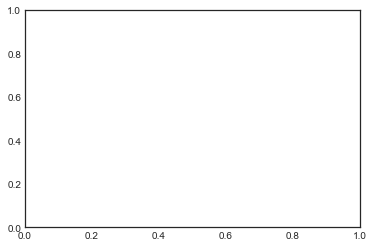

In [34]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

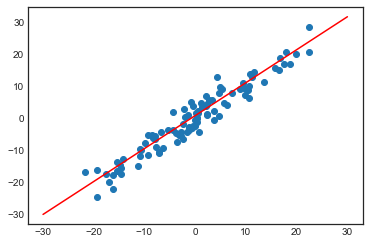

In [35]:
plot_fit('Trained Model')